In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math

## Problem Statement
We're interested in the relationship between water salinity "Salnty" and water temperature "T_degC" and whether we can predict the water temperature based on its salinity. 

Our weapon of choice is going to be the ML technique simple linear regression following the machine learning specialization course by deeplearning.ai. This is just 
to get a better understanding of how the technique functions and how it performs against other implementations (later)

In [21]:
df = pd.read_csv("tempsal.csv")

In [22]:
df.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [4]:
df.isna().sum()
# We can either drop the rows with missing values 
# or fill with the average of the column so they don't 
# affect our calculations

T_degC    10963
Salnty    47354
dtype: int64

In [5]:
df.dropna(axis = 0, inplace=True)
df.isna().sum()

T_degC    0
Salnty    0
dtype: int64

In [6]:
x = np.array(df["Salnty"])
y = np.array(df["T_degC"])

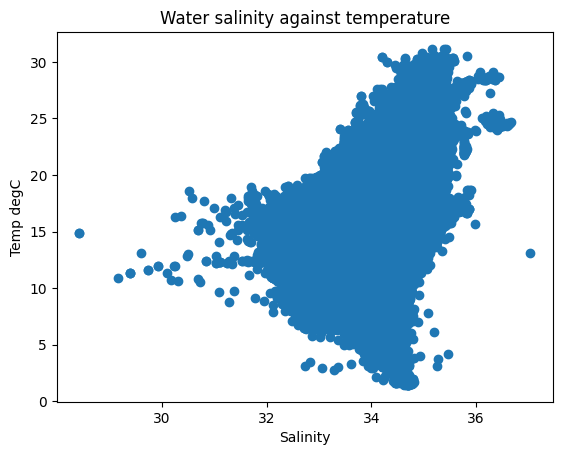

In [7]:
plt.scatter(x = "Salnty", y = "T_degC", data = df)
plt.xlabel("Salinity")
plt.ylabel("Temp degC")
plt.title("Water salinity against temperature")
plt.show()

In [8]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression using 
    the whole batch
    
    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): target values
        w,b (scalar)    : model parameters
        
        Returns cost of using w, b as parameters for our linear regression model
        
    """
    m = x.shape[0]
    
    cost_sum = 0 
    for i in range(m):
        f_wb = w * x[i] + b # linear model
        cost = (f_wb - y[i]) ** 2 # difference between the predicted values and the actual 
        cost_sum += cost # summing over m examples
    total_cost = (1 / (2 * m)) * cost_sum
    
    return total_cost

In [9]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    
    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): target values 
        w,b (scalar)    : model parameters
    Returns
        dj_dw (scalar): partial derivative of cost w.r.t. w
        dj_db (scalar): partial derivative of cost w.r.t. b
    """
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    # summing from i = 0 to m - 1 the sum term in the partial derivatives
    for i in range(m):
        f_wb = w * x[i] + b  # Linear model 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
    
    return dj_dw, dj_db

In [10]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit linear model. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha (step size)
    
    Args:
        x (ndarray (m,))   : Data, m examples
        y (ndarray (m,))   : target values 
        w_in, b_in (scalar): initial values of model parameters
        alpha (float)      : Learning rate
        num_iters (int)    : number of iterations for gradient descent
        cost_function      : function to produce cost of current model
        gradient_function  : function to produce gradient of cost w.r.t. parameters
        
    Returns:
        w (scalar): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        """
    b = b_in
    w = w_in 
    
    for i in range(num_iters):
        #calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db =  compute_gradient(x, y, w, b)
        
        # Update parameters using our w = w - alpha*dj_dw etc.
        b = b - alpha * dj_db
        w = w - alpha * dj_dw 
            
    return w, b

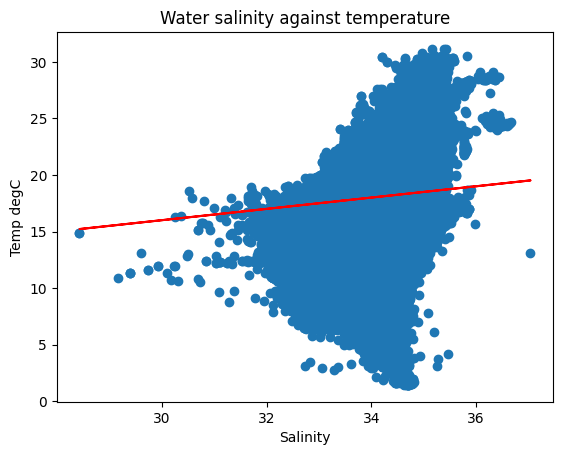

In [11]:
# an estimated line fit for intital w and b values
plt.scatter(x = "Salnty", y = "T_degC", data = df)
y1 = 0.5*x + 1
plt.plot(x, y1, '-r', label='y=wx+b')
plt.xlabel("Salinity")
plt.ylabel("Temp degC")
plt.title("Water salinity against temperature")
plt.show()

In [12]:
# We initialize a line based on our estimate
w_init = 0.5
b_init = 1 
# Calculate an 80-20 test/train split
train_size = round(x.shape[0]*0.8)
x_train = x[:train_size]
y_train = y[:train_size]
iteration = 1000
tmp_alpha = 1.0e-4
w_final, b_final = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iteration, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (  0.2885,  0.9967)


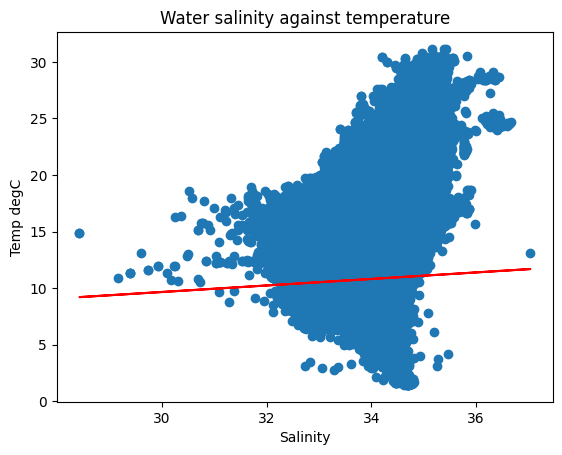

In [13]:
plt.scatter(x = "Salnty", y = "T_degC", data = df)
y1 = w_final*x + b_final
plt.plot(x, y1, '-r', label='y=wx+b')
plt.xlabel("Salinity")
plt.ylabel("Temp degC")
plt.title("Water salinity against temperature")
plt.show()

In [14]:
# Model performance on the test
x_test = x[train_size:]
y_test = y[train_size:]
print(f"Our estimate's cost {compute_cost(x_test, y_test, 0.5, 1)}\n"
      f"Our model's cost {compute_cost(x_test, y_test, w_final, b_final)}")

Our estimate's cost 30.191735506774016
Our model's cost 7.209610283172681


Let's compare our attempt against scikit learn's linear regression

In [16]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

X = x.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

model = LinearRegression()

model.fit(X, y)

w = model.coef_[0]
b = model.intercept_ 

y_pred = model.predict(X_test)

In [18]:
print(f"The cost of scikit learn's linear regression model is {compute_cost(x_test, y_test, model.coef_[0], model.intercept_)}")

The cost of scikit learn's linear regression model is 10.899434585125158


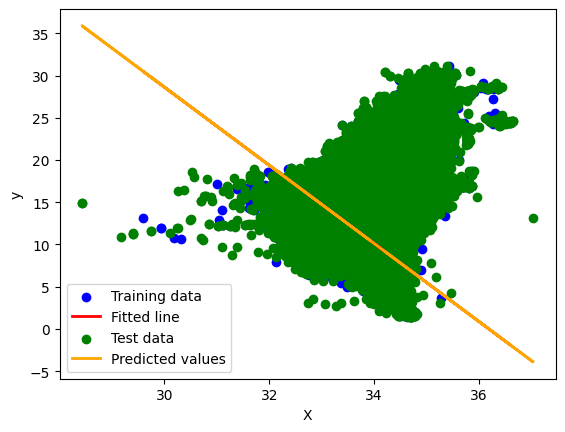

In [17]:
# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the regression line
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Fitted line')

# Plot the test data and predicted values
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.plot(X_test, y_pred, color='orange', linewidth=2, label='Predicted values')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()